In [1]:
%%bash

pip install -q kaggle
mkdir -p ~/.kaggle
cp drive/MyDrive/kaggle.json ~/.kaggle/
chmod 600 /root/.kaggle/kaggle.json
kaggle datasets download -d krishnapaanchajanya/american-sign-language-asl

100%|██████████| 332M/332M [00:18<00:00, 18.6MB/s]


In [2]:
!unzip american-sign-language-asl.zip

Streaming output truncated to the last 5000 lines.
  inflating: American Sign Language (ASL)/dataCE/J/189.jpg  
  inflating: American Sign Language (ASL)/dataCE/J/19.jpg  
  inflating: American Sign Language (ASL)/dataCE/J/190.jpg  
  inflating: American Sign Language (ASL)/dataCE/J/191.jpg  
  inflating: American Sign Language (ASL)/dataCE/J/192.jpg  
  inflating: American Sign Language (ASL)/dataCE/J/193.jpg  
  inflating: American Sign Language (ASL)/dataCE/J/194.jpg  
  inflating: American Sign Language (ASL)/dataCE/J/195.jpg  
  inflating: American Sign Language (ASL)/dataCE/J/196.jpg  
  inflating: American Sign Language (ASL)/dataCE/J/197.jpg  
  inflating: American Sign Language (ASL)/dataCE/J/198.jpg  
  inflating: American Sign Language (ASL)/dataCE/J/199.jpg  
  inflating: American Sign Language (ASL)/dataCE/J/2.jpg  
  inflating: American Sign Language (ASL)/dataCE/J/20.jpg  
  inflating: American Sign Language (ASL)/dataCE/J/200.jpg  
  inflating: American Sign Language (A

In [3]:
!ls

'American Sign Language (ASL)'	  drive
 american-sign-language-asl.zip   sample_data


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
import numpy as  np

In [8]:
data_gen = ImageDataGenerator(
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    rescale=1./255,
    validation_split=0.2
)

In [37]:
train_set = data_gen.flow_from_directory(
    "American Sign Language (ASL)/data/",
    target_size=(120, 120),
    class_mode='binary',
    subset='training',
    batch_size=32,
    seed=437
)

Found 6480 images belonging to 27 classes.


In [38]:
valid_set = data_gen.flow_from_directory(
    "American Sign Language (ASL)/data/",
    target_size=(120, 120),
    class_mode='binary',
    subset='validation',
    batch_size=32,
    seed=437
)

Found 1620 images belonging to 27 classes.


In [39]:
valid_set.target_size

(120, 120)

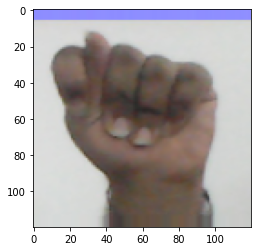

In [40]:
import matplotlib.pyplot as plt
plt.imshow(train_set[0][0][0])

In [48]:
model = models.Sequential()

model.add(layers.Conv2D(input_shape=(120, 120, 3), kernel_size=3, activation='relu', filters=32))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2)) 
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(240, activation='relu'))
model.add(layers.Dense(27, activation='softmax'))

In [49]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 59, 59, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 59, 59, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 57, 57, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 28, 28, 32)       

In [51]:
history = model.fit(x=train_set, batch_size=32, epochs=25, validation_data=valid_set) 

Epoch 1/25
203/203 [==============================] - 41s 198ms/step - loss: 2.4738 - accuracy: 0.2853 - val_loss: 1.5416 - val_accuracy: 0.5222
Epoch 2/25
203/203 [==============================] - 37s 182ms/step - loss: 0.6550 - accuracy: 0.7935 - val_loss: 0.7926 - val_accuracy: 0.7549
Epoch 3/25
203/203 [==============================] - 37s 184ms/step - loss: 0.2791 - accuracy: 0.9150 - val_loss: 0.6402 - val_accuracy: 0.8154
Epoch 4/25
203/203 [==============================] - 37s 182ms/step - loss: 0.1743 - accuracy: 0.9512 - val_loss: 0.5495 - val_accuracy: 0.8488
Epoch 5/25
203/203 [==============================] - 38s 188ms/step - loss: 0.1265 - accuracy: 0.9625 - val_loss: 0.5528 - val_accuracy: 0.8519
Epoch 6/25
203/203 [==============================] - 38s 187ms/step - loss: 0.0906 - accuracy: 0.9713 - val_loss: 0.5400 - val_accuracy: 0.8525
Epoch 7/25
203/203 [==============================] - 37s 180ms/step - loss: 0.0689 - accuracy: 0.9801 - val_loss: 0.5097 - val_ac

In [100]:
from tensorflow.keras.preprocessing import image

img = image.load_img("American Sign Language (ASL)/dataCE/W/209.jpg", target_size=(120, 120))

In [101]:
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0) 


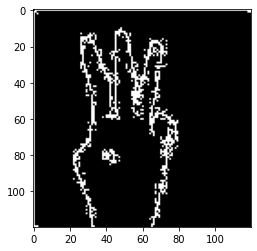

In [102]:
plt.imshow(img[0])

In [103]:
train_set.class_indices

{'0': 0,
 'A': 1,
 'B': 2,
 'C': 3,
 'D': 4,
 'E': 5,
 'F': 6,
 'G': 7,
 'H': 8,
 'I': 9,
 'J': 10,
 'K': 11,
 'L': 12,
 'M': 13,
 'N': 14,
 'O': 15,
 'P': 16,
 'Q': 17,
 'R': 18,
 'S': 19,
 'T': 20,
 'U': 21,
 'V': 22,
 'W': 23,
 'X': 24,
 'Y': 25,
 'Z': 26}

In [104]:
result = model.predict(img)
print(result)

1/1 [==============================] - 0s 16ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0.]]


In [105]:
loc = 0
for i in range(0, len(result[0])):
  if result[0][i] == 1.:
    loc = i
iter = 0
for stuff in train_set.class_indices.keys():
  if iter == loc:
    print("Predicted Sign Is --> ", stuff)
  iter += 1

Predicted Sign Is -->  W
